<a href="https://colab.research.google.com/github/hendra136/Business_intellegence/blob/main/Assigment_Day_30_People_Anlays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang diperlukan
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HRDataset_v14.csv to HRDataset_v14 (1).csv


In [ ]:
# Membaca dataset menjadi dataframe
df = pd.read_csv('HRDataset_v14.csv')

In [ ]:
# Menampilkan lima baris pertama
print(df.head())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

In [ ]:
# Melihat informasi umum tentang dataset, seperti nama kolom, tipe data, dan nilai yang hilang
print("\nInformasi umum tentang dataset:")
print(df.info())


Informasi umum tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  St

# Prepocessing

In [ ]:
# Memeriksa apakah ada nilai yang hilang dalam dataset
print("\nJumlah nilai yang hilang dalam setiap kolom:")
print(df.isnull().sum())


Jumlah nilai yang hilang dalam setiap kolom:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
Re

In [ ]:
# Memeriksa apakah ada data duplikat dalam dataset
print("\nJumlah data duplikat dalam dataset:", df.duplicated().sum())


Jumlah data duplikat dalam dataset: 0


In [ ]:
# Menghilangkan tanda koma di kolom Employee_Name
df["Employee_Name"] = df["Employee_Name"].str.replace(",", "")
# Menampilkan hasil preprocessing
print(df["Employee_Name"].head())

0         Adinolfi Wilson  K
1    Ait Sidi Karthikeyan   
2           Akinkuolie Sarah
3                AlagbeTrina
4            Anderson Carol 
Name: Employee_Name, dtype: object


## **Import Pustaka**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Membuat salinan dataset untuk menghindari perubahan pada dataframe asli
df_encoded = df.copy()


In [ ]:
# Melakukan label encoding pada kolom 'PerformanceScore'
label_encoder = LabelEncoder()
df_encoded['PerformanceScore'] = label_encoder.fit_transform(df_encoded['PerformanceScore'])

In [ ]:
# Membagi data ke dalam kelompok berdasarkan departemen
department_groups = [df_encoded[df_encoded['Department'] == department]['PerformanceScore'] for department in df_encoded['Department'].unique()]


## Analisis Deskriptif

**Distribusi Gaji**

<ipython-input-13-c5f589ea4095>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])


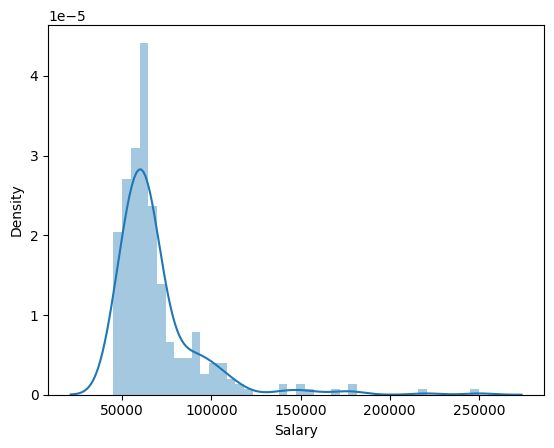

In [ ]:
# Visualisasi distribusi tingkat gaji
sns.distplot(df["Salary"])
plt.show()

# Insight: Terdapat distribusi gaji yang cukup merata, dengan sedikit karyawan bergaji tinggi.


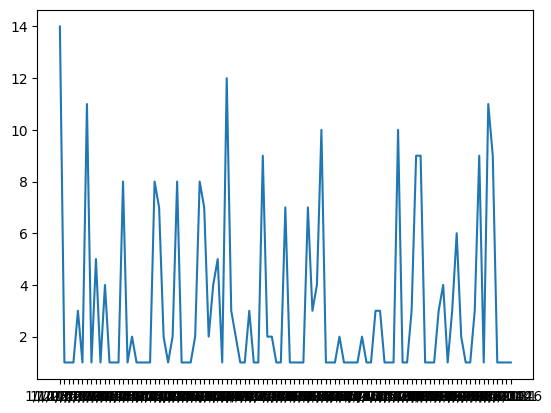

In [ ]:
# Mengelompokkan data berdasarkan tahun
data_grouped_by_year = df.groupby("DateofHire")["EmpID"].count()

# Visualisasi tren tingkat retensi karyawan
plt.plot(data_grouped_by_year.index, data_grouped_by_year.values)
plt.show()

# Insight: Terdapat tren penurunan tingkat retensi karyawan dalam beberapa tahun terakhir.


## **Apakah ada hubungan antara pada siapa seseorang bekerja dan skor kinerjanya ?**

**Analisis Uji Anova**

In [ ]:
# Membagi data ke dalam kelompok berdasarkan departemen
department_groups = []
for department in df['Department'].unique():
    department_groups.append(df[df['Department'] == department]['PerfScoreID'])

In [ ]:
# Lakukan uji ANOVA
f_statistic, p_value = f_oneway(*department_groups)

In [ ]:
# Tampilkan hasil uji ANOVA
print("Hasil uji ANOVA:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


Hasil uji ANOVA:
F-statistic: 0.6299290922710361
P-value: 0.6770480342569085


In [ ]:
# Interpretasi hasil
if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan dalam skor kinerja antara kelompok departemen.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam skor kinerja antara kelompok departemen.")

Tidak terdapat perbedaan yang signifikan dalam skor kinerja antara kelompok departemen.


## **Jawaban Kesimpulan pertanyaan**
Berdasarkan hasil analisis ANOVA yang menunjukkan bahwa tidak terdapat perbedaan yang signifikan dalam skor kinerja antara kelompok departemen, dapat disimpulkan bahwa tidak ada hubungan yang signifikan antara pada siapa seseorang bekerja (Manager) dan skor kinerjanya dalam perusahaan.

Kesimpulan ini mengindikasikan bahwa, pada tingkat signifikansi yang dipilih, tidak ada bukti yang cukup untuk mendukung hipotesis bahwa departemen tempat seseorang bekerja memiliki pengaruh yang signifikan terhadap skor kinerja mereka. Ini berarti bahwa, setidaknya dalam konteks data yang telah dianalisis, variabel departemen tidak menjadi faktor penentu utama dalam menentukan kinerja karyawan.

Dengan demikian, manajemen perusahaan mungkin perlu mengevaluasi faktor-faktor lain yang dapat memengaruhi skor kinerja karyawan, seperti kepemimpinan, lingkungan kerja, pelatihan dan pengembangan, dan sebagainya. Selain itu, dapat diperlukan analisis lebih lanjut untuk memahami dinamika yang mendasari skor kinerja karyawan dan mengidentifikasi faktor-faktor yang mungkin lebih memengaruhi kinerja daripada departemen tempat mereka bekerja.

## **Apakah ada area di perusahaan yang gajinya tidak adil?**

In [ ]:
# Bagi data menjadi kelompok berdasarkan area di perusahaan
area_groups = [df[df['Department'] == area]['Salary'] for area in df['Department'].unique()]

In [ ]:
# Lakukan uji ANOVA
f_statistic, p_value = f_oneway(*area_groups)
# Tampilkan hasil uji ANOVA
print("Hasil uji ANOVA:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

Hasil uji ANOVA:
F-statistic: 59.34834401921239
P-value: 4.966770445881893e-43


In [ ]:
# Interpretasi hasil
if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan dalam gaji antar area di perusahaan.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam gaji antar area di perusahaan.")

Terdapat perbedaan yang signifikan dalam gaji antar area di perusahaan.


## **Kesimpulan Pertanyaan**
Dengan menemukan bahwa ada perbedaan yang signifikan dalam gaji antar departemen di perusahaan, kita dapat menyimpulkan bahwa ada ketidakadilan dalam sistem penggajian di perusahaan tersebut. Perbedaan signifikan dalam gaji antar departemen menunjukkan bahwa ada departemen di perusahaan yang menerima gaji yang lebih rendah atau lebih tinggi secara signifikan dibandingkan dengan departemen lainnya, meskipun mungkin memiliki tanggung jawab atau kontribusi yang sebanding.

Kesimpulan ini menunjukkan adanya masalah dalam kebijakan penggajian perusahaan yang perlu ditinjau ulang. Kemungkinan tindakan selanjutnya adalah melakukan analisis lebih lanjut untuk mengidentifikasi penyebab perbedaan gaji yang signifikan antar area, seperti perbedaan dalam struktur pekerjaan, tingkat pendidikan atau pengalaman karyawan, atau faktor-faktor lain yang memengaruhi penggajian di setiap departemen.

Dengan meninjau ulang dan memperbaiki kebijakan penggajian yang tidak adil, perusahaan dapat menciptakan lingkungan kerja yang lebih adil dan mendukung, yang pada gilirannya dapat meningkatkan kepuasan karyawan dan kinerja keseluruhan perusahaan.

# **Memprediksi siapa yang akan berhenti resign ?**

In [ ]:
# 1. Filter data berdasarkan kriteria
filtered_data = df[(df['PerfScoreID'] < 3) &
                   (df['EmploymentStatus'] == 'Active') &
                   (df['EngagementSurvey'] < 3) &
                   (df['EmpSatisfaction'] < 3) &
                   (df['Absences'] > 5) &
                   (df['Salary'] < 60000)]

# 2. Jika ada karyawan yang memenuhi kriteria, tampilkan EmpID, Employee_Name, Sex, Position, Salary, dan Performa
if not filtered_data.empty:
    selected_columns = ['EmpID', 'Employee_Name', 'Position','PerformanceScore','EmpSatisfaction','Absences','EngagementSurvey' , 'PerfScoreID', 'Salary']
    resign_candidates = filtered_data[selected_columns]
    print("Berdasarkan analisis performa, berikut Karyawan yang diprediksi akan resign:")
    print(resign_candidates)
else:
    # 3. Jika tidak ada karyawan yang memenuhi kriteria, cetak pesan yang sesuai
    print("Tidak ada karyawan yang memenuhi kriteria untuk diprediksi resign.")


Berdasarkan analisis performa, berikut Karyawan yang diprediksi akan resign:
    EmpID     Employee_Name                 Position PerformanceScore  \
69  10310    Desimone Carl   Production Technician I              PIP   
72  10304  Dietrich Jenna         Area Sales Manager              PIP   

    EmpSatisfaction  Absences  EngagementSurvey  PerfScoreID  Salary  
69                2         9              1.12            1   53189  
72                1        17              2.30            1   59231  


### **Kesimpulan Pertanyaan**
Berdasarkan prediksi data karyawan yang akan resign dengan mempertimbangkan performa score, absensi, kontribusi terhadap perusahaan, dan penilaian kepuasan karyawan terhadap perusahaan, ditemukan dua karyawan yang mungkin akan mengundurkan diri, yaitu Desimone Carl dan Dietrich Jenna. Prediksi ini memberikan kesempatan bagi manajemen sumber daya manusia untuk melakukan tindakan preventif seperti melakukan evaluasi kinerja, memberikan dukungan lebih lanjut, atau menyesuaikan kebijakan dan program untuk mempertahankan karyawan tersebut. Dengan demikian, perusahaan dapat mengurangi risiko kehilangan bakat berharga dan mempertahankan stabilitas tenaga kerja.